In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [3]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

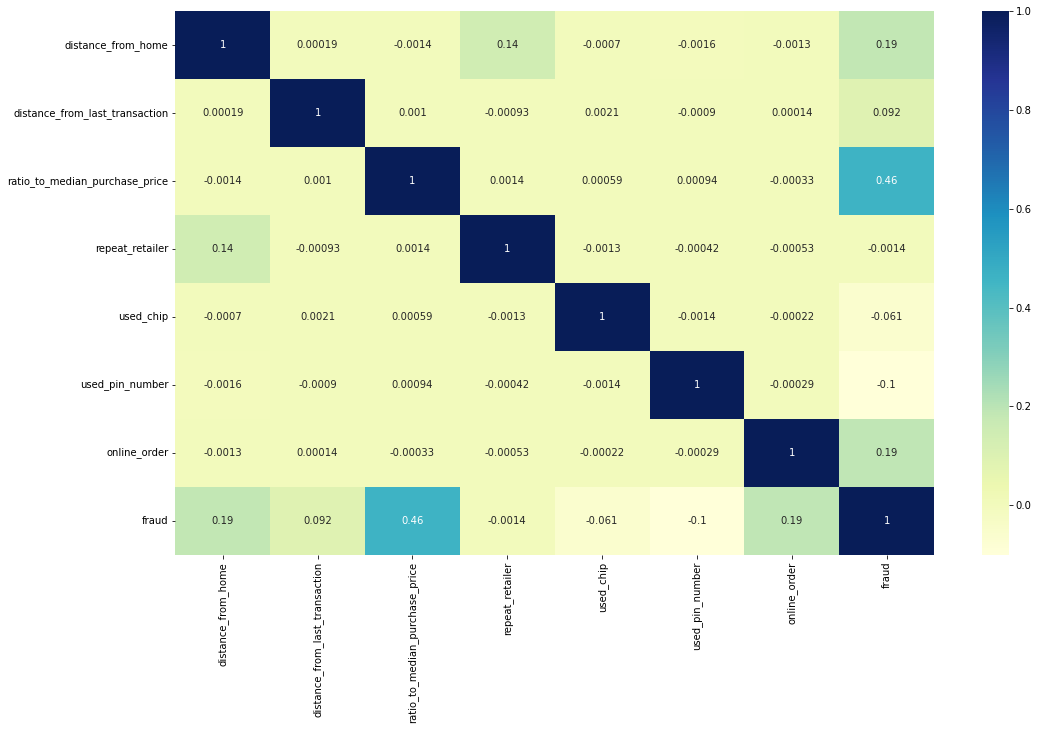

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = df.corr()
top_features = cm.index
plt.figure(figsize=(17,10))
sns.heatmap(df[top_features].corr(), annot=True, cmap = "YlGnBu")

In [6]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

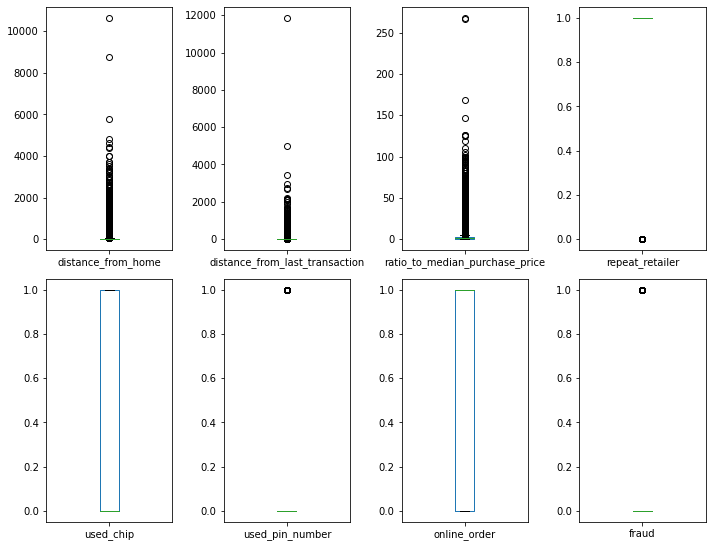

In [7]:
plt.figure(figsize = (10,15))
col = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud']
for i,col in enumerate (df.columns):
    plt.subplot(4,4,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [32]:

Q1 = np.percentile(df['distance_from_home'], 25)
Q3 = np.percentile(df['distance_from_home'], 75)
IQR = Q3-Q1
IQRmin = Q1 - 1.5*IQR
IQRmax = Q3 + 1.5*IQR

print('IQRmax', IQRmax)
print('IQRmin', IQRmin)

IQRmax 58.54295065212743
IQRmin -28.920957602736546


In [28]:
#CAPPING of Outliers

new_df['distance_from_home'] = np.where(
    new_df['distance_from_home'] > IQRmax,
    IQRmax,
    np.where(
        new_df['distance_from_home'] < IQRmin,
         IQRmin,
        new_df['distance_from_home']
    )
)


In [34]:
Q12 = np.percentile(df['distance_from_last_transaction'], 25)
Q32 = np.percentile(df['distance_from_last_transaction'], 75)
IQR = Q32-Q12
IQRmin2 = Q12 - 1.5*IQR
IQRmax2 = Q32 + 1.5*IQR

print('IQRmax2', IQRmax2)
print('IQRmin2', IQRmin2)

new_df['distance_from_last_transaction'] = np.where(
    new_df['distance_from_last_transaction'] >  IQRmax2,
    IQRmax2,
    np.where(
        new_df['distance_from_last_transaction'] <  IQRmin2,
         IQRmin2,
        new_df['distance_from_last_transaction']
    )
)

IQRmax2 7.944363262531519
IQRmin2 -4.291944930383116


In [35]:
Q13 = np.percentile(df['ratio_to_median_purchase_price'], 25)
Q33 = np.percentile(df['ratio_to_median_purchase_price'], 75)
IQR = Q33-Q13
IQRmin3 = Q13 - 1.5*IQR
IQRmax3 = Q33 + 1.5*IQR

print('IQRmax3', IQRmax3)
print('IQRmin3', IQRmin3)

new_df['ratio_to_median_purchase_price'] = np.where(
    new_df['ratio_to_median_purchase_price'] > IQRmax3,
    IQRmax3,
    np.where(
        new_df['ratio_to_median_purchase_price'] < IQRmin3,
        IQRmin3,
        new_df['ratio_to_median_purchase_price']
    )
)

IQRmax3 4.527415677411437
IQRmin3 -1.9553720889586974


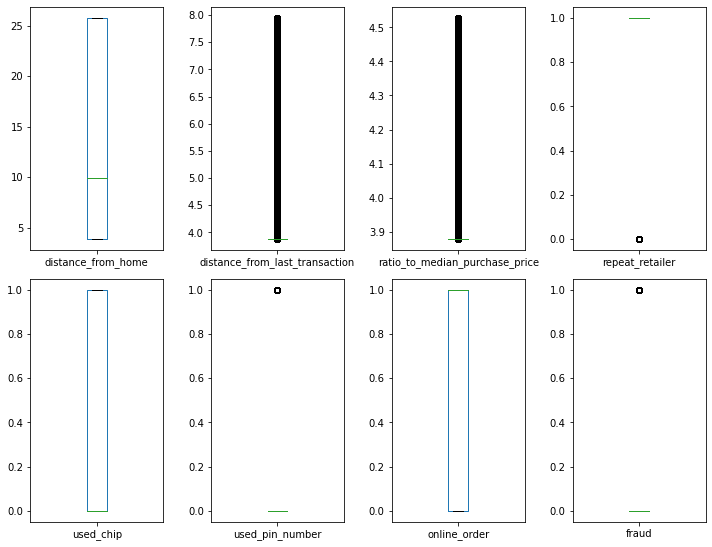

In [36]:
plt.figure(figsize = (10,15))
col = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud']
for i,col in enumerate (new_df.columns):
    plt.subplot(4,4,i+1)
    new_df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [37]:
df.sum().isnull()

distance_from_home                False
distance_from_last_transaction    False
ratio_to_median_purchase_price    False
repeat_retailer                   False
used_chip                         False
used_pin_number                   False
online_order                      False
fraud                             False
dtype: bool

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [39]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [40]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [41]:
df.distance_from_home.unique()

array([57.87785658, 10.8299427 ,  5.09107949, ...,  2.91485699,
        4.25872939, 58.10812496])

In [42]:
df.distance_from_last_transaction.unique()

array([0.31114001, 0.1755915 , 0.80515259, ..., 1.47268669, 0.24202337,
       0.31811012])

In [43]:
df.ratio_to_median_purchase_price.unique()

array([1.94593998, 1.29421881, 0.42771456, ..., 0.21807549, 0.47582206,
       0.38691985])

In [44]:
df.repeat_retailer.unique()

array([1., 0.])

In [45]:
df.used_chip.unique()

array([1., 0.])

In [46]:
df.used_pin_number.unique()

array([0., 1.])

In [47]:
df.online_order.unique()

array([0., 1.])

In [48]:
df.fraud.unique()

array([0., 1.])

In [49]:
df.fraud.value_counts(normalize = True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

In [50]:
df.fraud.value_counts() 

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [52]:
# This dataset seems to be an imbalanced dataset
# To balance the dataset, we need to use SMOTE(synthetic oversampling) 
# We are using oversampling technique here as data is less in quantity and we don't want to miss any important information also
# otherwise we would have used undersampling.
# We will perform this step once we split the dataset.

In [53]:
# Normalise 1st 3 columns -

df['ndistance_from_home'] = StandardScaler().fit_transform(np.array(df['distance_from_home']).reshape(-1, 1))
df['ndistance_from_last_transaction'] = StandardScaler().fit_transform(np.array(df['distance_from_last_transaction']).reshape(-1, 1))
df['nratio_to_median_purchase_price'] = StandardScaler().fit_transform(np.array(df['ratio_to_median_purchase_price']).reshape(-1, 1))

df = df.drop(['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price'], axis = 1)

In [54]:
df.head()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,ndistance_from_home,ndistance_from_last_transaction,nratio_to_median_purchase_price
0,1.0,1.0,0.0,0.0,0.0,0.477882,-0.182849,0.043491
1,1.0,0.0,0.0,0.0,0.0,-0.241607,-0.188094,-0.189300
2,1.0,0.0,0.0,1.0,0.0,-0.329369,-0.163733,-0.498812
3,1.0,1.0,0.0,1.0,0.0,-0.372854,0.021806,-0.522048
4,1.0,1.0,0.0,1.0,0.0,0.268572,-0.172968,0.142373


In [55]:
X = df.drop(['fraud'], axis = 1)
X.head()

,repeat_retailer,used_chip,used_pin_number,online_order,ndistance_from_home,ndistance_from_last_transaction,nratio_to_median_purchase_price
0,1.0,1.0,0.0,0.0,0.477882,-0.182849,0.043491
1,1.0,0.0,0.0,0.0,-0.241607,-0.188094,-0.189300
2,1.0,0.0,0.0,1.0,-0.329369,-0.163733,-0.498812
3,1.0,1.0,0.0,1.0,-0.372854,0.021806,-0.522048
4,1.0,1.0,0.0,1.0,0.268572,-0.172968,0.142373


In [56]:
y = df.fraud
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: fraud, dtype: float64

In [57]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700000, 7), (300000, 7), (700000,), (300000,))

In [59]:
# Apply Classification Models

In [60]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273907
         1.0       0.89      0.60      0.72     26093

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000



In [61]:
# From above classification report it can be seen that recall is baised towards majority class i.e. 0 , 
# its a case of an imbalanced dataset 

In [ ]:
# Using SMOTE Algorithm

In [62]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 61310
Before OverSampling, counts of label '0': 638690 

After OverSampling, the shape of train_X: (1277380, 7)
After OverSampling, the shape of train_y: (1277380,) 

After OverSampling, counts of label '1': 638690
After OverSampling, counts of label '0': 638690


In [69]:
lr=LogisticRegression()
lr.fit(X_train_res, y_train_res)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273907
         1.0       0.57      0.95      0.71     26093

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



In [64]:
# Using undersampling

print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 61310
Before Undersampling, counts of label '0': 638690 

After Undersampling, the shape of train_X: (122620, 7)
After Undersampling, the shape of train_y: (122620,) 

After Undersampling, counts of label '1': 61310
After Undersampling, counts of label '0': 61310


In [65]:
lr=LogisticRegression()
lr.fit(X_train_miss, y_train_miss.ravel())

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98    273907
         1.0       0.71      0.83      0.76     26093

    accuracy                           0.95    300000
   macro avg       0.84      0.90      0.87    300000
weighted avg       0.96      0.95      0.96    300000



In [70]:
df.head()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,ndistance_from_home,ndistance_from_last_transaction,nratio_to_median_purchase_price
0,1.0,1.0,0.0,0.0,0.0,0.477882,-0.182849,0.043491
1,1.0,0.0,0.0,0.0,0.0,-0.241607,-0.188094,-0.189300
2,1.0,0.0,0.0,1.0,0.0,-0.329369,-0.163733,-0.498812
3,1.0,1.0,0.0,1.0,0.0,-0.372854,0.021806,-0.522048
4,1.0,1.0,0.0,1.0,0.0,0.268572,-0.172968,0.142373


In [67]:
lr.predict([[1,1,0,0,4,7,1]])

array([1.])